# **Analyzing Police Activity with pandas**

# Chap 1: Preparing the data for analysis

In [1]:
# Import plotting modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Stanford Open Policing Project dataset

In [2]:
# Preparing the data

ri = pd.read_csv("datasets/police.csv")
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [4]:
ri.shape

(91741, 15)

In [5]:
ri.drop('county_name', axis='columns', inplace=True)

In [6]:
ri.dropna(subset=['stop_date','stop_time']).shape

(91741, 14)

No data is missing in the given columns.

### Exercises

**Examining the dataset**

In [7]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('datasets/police.csv')

# Examine the head of the DataFrame
print(ri.head(5))

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

**Dropping columns**

In [8]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
(91741, 15)
(91741, 13)


**Dropping rows**

In [9]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


## Using proper data types

In [10]:
# Examining the data types
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [11]:
# Fixing a data type
apple = pd.read_csv("datasets/aapl_ohlc.csv",usecols=[0,1,2],dtype='O')
apple.head(3)

,date,time,price
0,2/1/2018,16:00,170.1600037
1,3/1/2018,16:00,172.5299988
2,4/1/2018,16:00,172.5399933


In [12]:
apple.price.dtype

dtype('O')

In [13]:
apple['price'] = apple.price.astype('float')
apple.price.dtype

dtype('float64')

### Exercises

**Finding an incorrect data type**

In [14]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [15]:
ri.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


is_arrested should have a data type of bool

**Fixing a data type**

In [16]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
object
bool


## Creating a DatetimeIndex

In [17]:
# Using datetime format
ri.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [18]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [19]:
apple.head(3)

,date,time,price
0,2/1/2018,16:00,170.160004
1,3/1/2018,16:00,172.529999
2,4/1/2018,16:00,172.539993


In [20]:
apple.date.str.replace('/','-').head(3)

0    2-1-2018
1    3-1-2018
2    4-1-2018
Name: date, dtype: object

In [21]:
combined = apple.date.str.cat(apple.time, sep=' ')
combined.head(3)

0    2/1/2018 16:00
1    3/1/2018 16:00
2    4/1/2018 16:00
Name: date, dtype: object

In [22]:
# Converting to datetime format
apple['date_and_time'] = pd.to_datetime(combined)
apple.head(3)

,date,time,price,date_and_time
0,2/1/2018,16:00,170.160004,2018-02-01 16:00:00
1,3/1/2018,16:00,172.529999,2018-03-01 16:00:00
2,4/1/2018,16:00,172.539993,2018-04-01 16:00:00


In [23]:
apple.dtypes

date                     object
time                     object
price                   float64
date_and_time    datetime64[ns]
dtype: object

In [24]:
apple.set_index('date_and_time', inplace=True)
apple.head(3)

,date,time,price
date_and_time,,,
2018-02-01 16:00:00,2/1/2018,16:00,170.160004
2018-03-01 16:00:00,3/1/2018,16:00,172.529999
2018-04-01 16:00:00,4/1/2018,16:00,172.539993


In [25]:
apple.index

DatetimeIndex(['2018-02-01 16:00:00', '2018-03-01 16:00:00',
               '2018-04-01 16:00:00', '2018-05-01 16:00:00',
               '2018-08-01 16:00:00', '2018-09-01 16:00:00',
               '2018-10-01 16:00:00', '2018-11-01 16:00:00',
               '2018-12-01 16:00:00', '2018-01-16 16:00:00',
               '2018-01-17 16:00:00', '2018-01-18 16:00:00',
               '2018-01-19 16:00:00', '2018-01-22 16:00:00',
               '2018-01-23 16:00:00', '2018-01-24 16:00:00',
               '2018-01-25 16:00:00', '2018-01-26 16:00:00',
               '2018-01-29 16:00:00', '2018-01-30 16:00:00',
               '2018-01-31 16:00:00', '2018-01-02 16:00:00',
               '2018-02-02 16:00:00', '2018-05-02 16:00:00',
               '2018-06-02 16:00:00', '2018-07-02 16:00:00',
               '2018-08-02 16:00:00', '2018-09-02 16:00:00',
               '2018-12-02 16:00:00', '2018-02-13 16:00:00',
               '2018-02-14 16:00:00', '2018-02-15 16:00:00',
               '2018-02-

In [26]:
apple.columns

Index(['date', 'time', 'price'], dtype='object')

### Exercises

**Combining object columns**

In [27]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


**Setting the index**

In [28]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


# Chap 2: Exploring the relationship between gender and policing

In [29]:
# Import plotting modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Do the genders commit different violations?

In [30]:
# Counting unique values
ri.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [31]:
ri.stop_outcome.value_counts().sum()

86536

In [32]:
ri.shape

(86536, 13)

In [33]:
# Expressing counts as proportions
77091/86536

0.8908546731995932

In [34]:
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [35]:
# Filtering DataFrame rows
ri.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [36]:
white = ri[ri.driver_race == 'White']
white.shape

(61870, 13)

In [37]:
# Comparing stop outcomes for two groups
white.stop_outcome.value_counts(normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [38]:
asian = ri[ri.driver_race == 'Asian']
asian.stop_outcome.value_counts(normalize=True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

### Exercises

**Examining traffic violations**

In [39]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


**Comparing violations by gender**

In [40]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


## Does gender affect who gets a ticket for speeding?

In [41]:
# Filtering by multiple conditions
female = ri[ri.driver_gender == 'F']
female.shape

(23774, 13)

In [42]:
female_and_arrested = ri[(ri.driver_gender == 'F') & 
                         (ri.is_arrested == True)]
female_and_arrested.shape

(669, 13)

In [43]:
female_or_arrested = ri[(ri.driver_gender == 'F') |
                        (ri.is_arrested == True)]
female_or_arrested.shape

(26183, 13)

### Exercise

**Filtering by multiple conditions**

Which one of these commands would filter the ri DataFrame to only include female drivers who were stopped for a speeding violation?

In [44]:
ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')].head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-14 11:20:00,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


**Comparing speeding outcomes by gender**

In [45]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


## Does gender affect whose vehicle is searched?

In [46]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [47]:
np.mean([0,1,0,0])

0.25

In [48]:
np.mean([False,True,False,False])

0.25

In [49]:
# Taking the mean of a Boolean Series
ri.is_arrested.value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [50]:
ri.is_arrested.mean()

0.0355690117407784

In [51]:
ri.is_arrested.dtype

dtype('bool')

In [52]:
# Comparing groups using groupby
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [53]:
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.024349083895853423

In [54]:
ri[ri.district == 'Zone K2'].is_arrested.mean()

0.030800588834786546

In [55]:
ri.groupby('district').is_arrested.mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

In [56]:
# Grouping by multiple categories
ri.groupby(['district','driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [57]:
ri.groupby(['driver_gender','district']).is_arrested.mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

### Exercises

**Calculate the search rate**

In [58]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


**Comparing search rates by gender**

In [59]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


In [60]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.04542557598546892


In [61]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


**Adding a second factor to the analysis**

In [62]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [63]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


## Does gender affect who is frisked during a search?

In [64]:
# Examining the search types
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [65]:
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

value_counts() excludes missing values by default  
dropna=False displays missing values

In [66]:
# Searching for a string
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

In [67]:
ri.inventory.dtype

dtype('bool')

In [68]:
ri.inventory.sum()

441

In [69]:
# Calculating the inventory rate
ri.inventory.mean()

0.0050961449570121106

In [70]:
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

0.5% of all traffic stops resulted in an inventory  
13.3% of searches included an inventory

### Exercises

**Counting protective frisks**

In [71]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [72]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

bool


In [73]:
# Take the sum of 'frisk'
print(ri.frisk.sum())

303


**Comparing frisk rates by gender**

In [74]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.09162382824312065


In [75]:
# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


# Chap 3: Visual exploratory data analysis

In [76]:
# Import plotting modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Does time of day affect arrest rate?

In [92]:
apple = pd.read_csv('datasets/aapl_ohlc.csv')
apple['date_and_time'] = pd.to_datetime(apple.date.str.replace('/','-').str.cat(apple.time,sep=' '))
apple.drop(columns=['date','time'], inplace=True)

In [93]:
# Accessing datetime attributes
apple.head(5)

,price,volume,date_and_time
0,170.160004,25555900,2018-02-01 16:00:00
1,172.529999,29517900,2018-03-01 16:00:00
2,172.539993,22434600,2018-04-01 16:00:00
3,173.440002,23660000,2018-05-01 16:00:00
4,174.350006,20567800,2018-08-01 16:00:00


In [94]:
apple.dtypes

price                   float64
volume                    int64
date_and_time    datetime64[ns]
dtype: object

In [95]:
apple.date_and_time.dt.month.head(5)

0    2
1    3
2    4
3    5
4    8
Name: date_and_time, dtype: int64

In [96]:
apple.set_index('date_and_time', inplace=True)
apple.index

DatetimeIndex(['2018-02-01 16:00:00', '2018-03-01 16:00:00',
               '2018-04-01 16:00:00', '2018-05-01 16:00:00',
               '2018-08-01 16:00:00', '2018-09-01 16:00:00',
               '2018-10-01 16:00:00', '2018-11-01 16:00:00',
               '2018-12-01 16:00:00', '2018-01-16 16:00:00',
               '2018-01-17 16:00:00', '2018-01-18 16:00:00',
               '2018-01-19 16:00:00', '2018-01-22 16:00:00',
               '2018-01-23 16:00:00', '2018-01-24 16:00:00',
               '2018-01-25 16:00:00', '2018-01-26 16:00:00',
               '2018-01-29 16:00:00', '2018-01-30 16:00:00',
               '2018-01-31 16:00:00', '2018-01-02 16:00:00',
               '2018-02-02 16:00:00', '2018-05-02 16:00:00',
               '2018-06-02 16:00:00', '2018-07-02 16:00:00',
               '2018-08-02 16:00:00', '2018-09-02 16:00:00',
               '2018-12-02 16:00:00', '2018-02-13 16:00:00',
               '2018-02-14 16:00:00', '2018-02-15 16:00:00',
               '2018-02-

In [97]:
apple.index.month

Int64Index([ 2,  3,  4,  5,  8,  9, 10, 11, 12,  1,  1,  1,  1,  1,  1,  1,  1,
             1,  1,  1,  1,  1,  2,  5,  6,  7,  8,  9, 12,  2,  2,  2,  2,  2,
             2,  2,  2,  2,  2,  2,  1,  2,  5,  6,  7,  8,  9, 12,  3,  3,  3,
             3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
           dtype='int64', name='date_and_time')

In [98]:
# Calculating the monthly mean price
apple.price.mean()

172.2736063508197

apple.groupby('month').price.mean() is invalid

In [99]:
apple.groupby(apple.index.month).price.mean()

date_and_time
1     174.189998
2     171.511429
3     173.956429
4     172.539993
5     169.250005
6     166.370003
7     169.014999
8     170.039998
9     169.860006
10    173.160004
11    174.589996
12    171.656662
Name: price, dtype: float64

In [100]:
monthly_price = apple.groupby(apple.index.month).price.mean()

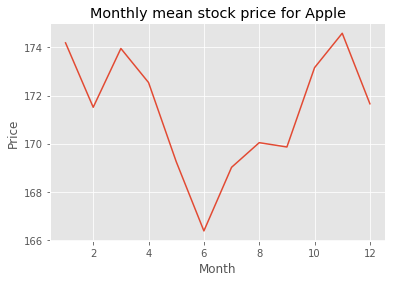

In [101]:
# Plotting the monthly mean price
monthly_price.plot();
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly mean stock price for Apple')
plt.show()

### Exercises 

**Calculating the hourly arrest rate**

In [103]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.0355690117407784


In [106]:
# Calculate the hourly arrest rate
print(ri.is_arrested.groupby(ri.index.hour).mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.is_arrested.groupby(ri.index.hour).mean()

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


**Plotting the hourly arrest rate**

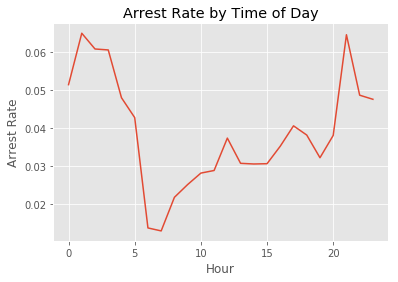

In [110]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

## Are drug-related stops on the rise?

In [111]:
# Resampling the price
apple.head(5)

,price,volume
date_and_time,,
2018-02-01 16:00:00,170.160004,25555900
2018-03-01 16:00:00,172.529999,29517900
2018-04-01 16:00:00,172.539993,22434600
2018-05-01 16:00:00,173.440002,23660000
2018-08-01 16:00:00,174.350006,20567800


In [112]:
apple.groupby(apple.index.month).price.mean().head(3)

date_and_time
1    174.189998
2    171.511429
3    173.956429
Name: price, dtype: float64

In [113]:
apple.price.resample('M').mean().head(3)

date_and_time
2018-01-31    174.189998
2018-02-28    171.511429
2018-03-31    173.956429
Freq: M, Name: price, dtype: float64

In [115]:
# Resampling the volume
apple.head(5)

,price,volume
date_and_time,,
2018-02-01 16:00:00,170.160004,25555900
2018-03-01 16:00:00,172.529999,29517900
2018-04-01 16:00:00,172.539993,22434600
2018-05-01 16:00:00,173.440002,23660000
2018-08-01 16:00:00,174.350006,20567800


In [116]:
apple.volume.resample('M').mean().head(3)

date_and_time
2018-01-31    3.888188e+07
2018-02-28    4.044285e+07
2018-03-31    3.451521e+07
Freq: M, Name: volume, dtype: float64

In [118]:
# Concatenating price and volume
monthly_price = apple.price.resample('M').mean()
monthly_volume = apple.volume.resample('M').mean()
monthly = pd.concat([monthly_price, monthly_volume], axis='columns')
monthly.head(3)

,price,volume
date_and_time,,
2018-01-31,174.189998,3.888188e+07
2018-02-28,171.511429,4.044285e+07
2018-03-31,173.956429,3.451521e+07


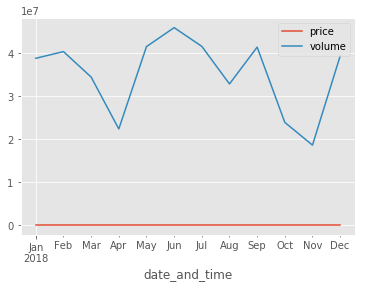

In [119]:
# Plotting price and volume (1)
monthly.plot()
plt.show()

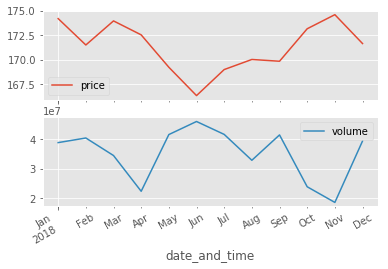

In [120]:
# Plotting price and volume (2)
monthly.plot(subplots=True)
plt.show()

### Exercises

**Plotting drug-related stops**

In [126]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


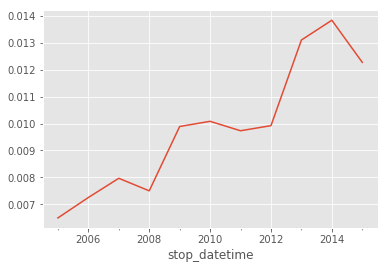

In [127]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

**Comparing drug and search rates**

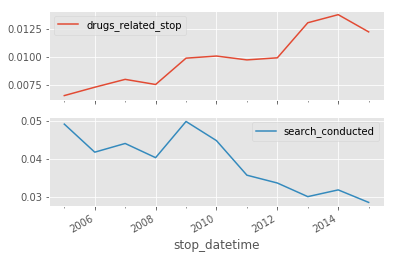

In [140]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

## What violations are caught in each district?

In [141]:
# Computing a frequency table
table = pd.crosstab(ri.driver_race, ri.driver_gender)
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


Frequency table: Tally of how many times each combination of values occurs

In [142]:
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

(551, 15)

In [143]:
# Selecting a DataFrame slice
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [144]:
table = table.loc['Asian':'Hispanic']
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


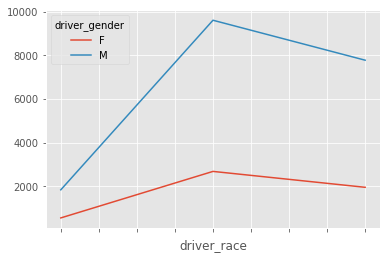

In [145]:
# Creating a line plot
table.plot()
plt.show()

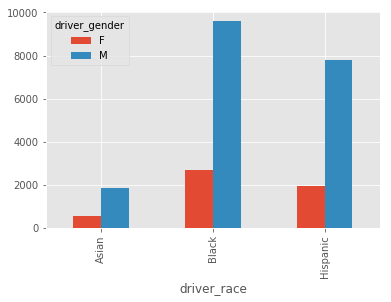

In [146]:
# Creating a bar plot
table.plot(kind='bar')
plt.show()

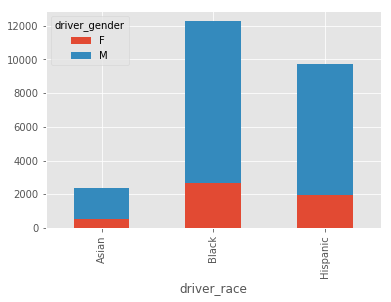

In [147]:
# Stacking the bars
table.plot(kind='bar', stacked=True)
plt.show()

### Exercises

**Tallying violations by district**

In [157]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district,ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district,ri.violation)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [158]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


**Plotting violations by district**

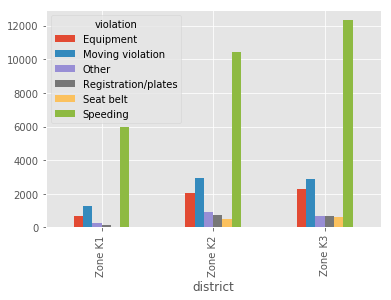

In [166]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

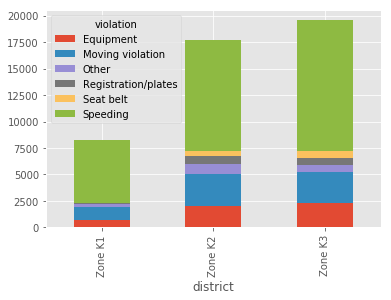

In [167]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar',stacked=True)

# Display the plot
plt.show()

## How long might you be stopped for a violation?

In [177]:
# Analyzing an object column
apple['change'] = (apple.price.diff()>=0).map({True:'up',False:'down'})
apple.head(5)

,price,volume,change
date_and_time,,,
2018-02-01 16:00:00,170.160004,25555900,down
2018-03-01 16:00:00,172.529999,29517900,up
2018-04-01 16:00:00,172.539993,22434600,up
2018-05-01 16:00:00,173.440002,23660000,up
2018-08-01 16:00:00,174.350006,20567800,up


In [178]:
apple.change.dtype

dtype('O')

In [179]:
# Mapping one set of values to another
mapping = {'up':True, 'down':False}
apple['is_up'] = apple.change.map(mapping)
apple.head(5)

,price,volume,change,is_up
date_and_time,,,,
2018-02-01 16:00:00,170.160004,25555900,down,False
2018-03-01 16:00:00,172.529999,29517900,up,True
2018-04-01 16:00:00,172.539993,22434600,up,True
2018-05-01 16:00:00,173.440002,23660000,up,True
2018-08-01 16:00:00,174.350006,20567800,up,True


In [180]:
apple.is_up.mean()

0.5245901639344263

**Calculating the search rate**

In [182]:
# Calculating the search rate
search_rate = ri.groupby('violation').search_conducted.mean()
search_rate

violation
Equipment              0.064280
Moving violation       0.057014
Other                  0.045362
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

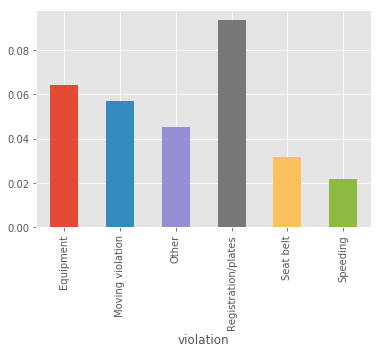

In [183]:
# Creating a bar plot
search_rate.plot(kind='bar')
plt.show()

In [184]:
# Ordering the bars (1)
search_rate.sort_values()

violation
Speeding               0.021560
Seat belt              0.031513
Other                  0.045362
Moving violation       0.057014
Equipment              0.064280
Registration/plates    0.093438
Name: search_conducted, dtype: float64

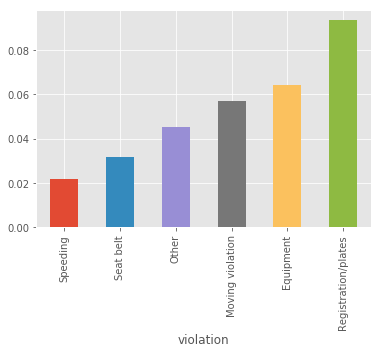

In [185]:
# Ordering the bars (2)
search_rate.sort_values().plot(kind='bar')
plt.show()

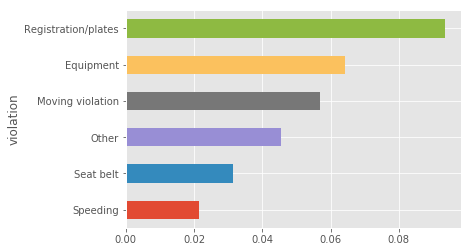

In [186]:
# Rotating the bars
search_rate.sort_values().plot(kind='barh')
plt.show()

### Exercises

**Converting stop durations to numbers**

In [189]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


**Plotting stop length**

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


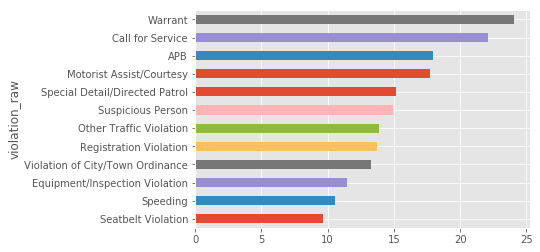

In [191]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.stop_minutes.groupby(ri.violation_raw).mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.stop_minutes.groupby(ri.violation_raw).mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values()

# Display the plot
stop_length.sort_values().plot(kind='barh')
plt.show()

# Chap 4: Analyzing the effect of weather on policing

In [192]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

## Exploring the weather dataset

In [194]:
# Examining the columns
weather = pd.read_csv('datasets/weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


TAVG, TMIN, TMAX: Temperature  
AWND, WSF2: Wind speed  
WT01 ... WT22: Bad weather conditions

In [195]:
# Examining wind speed
weather[['AWND', 'WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


In [196]:
weather[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


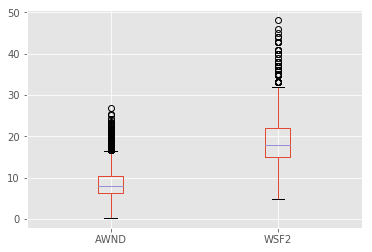

In [197]:
# Creating a box plot
weather[['AWND', 'WSF2']].plot(kind='box')
plt.show()

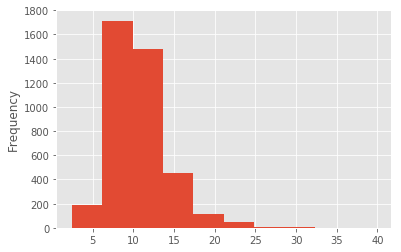

In [198]:
# Creating a histogram (1)
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')
plt.show()

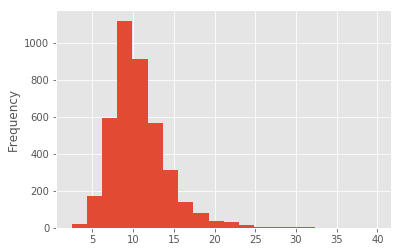

In [199]:
# Creating a histogram (2)
weather.WDIFF.plot(kind='hist', bins=20)
plt.show()

### Exercises

**Plotting the temperature**

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


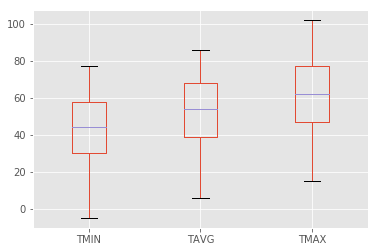

In [205]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('datasets/weather.csv')

# Describe the temperature columns
print(weather[['TMIN','TAVG','TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN','TAVG','TMAX']].plot(kind='box')

# Display the plot
plt.show()

**Plotting the temperature difference**

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


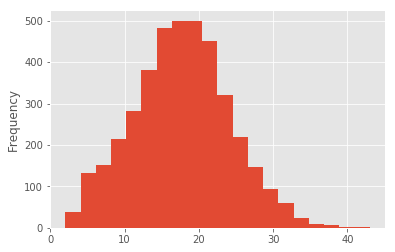

In [211]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist',bins=20)

# Display the plot
plt.show()

## Categorizing the weather

In [214]:
# Selecting a DataFrame slice
weather.shape

(4017, 28)

In [215]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'TDIFF'],
      dtype='object')

In [216]:
temp = weather.loc[:, 'TAVG':'TMAX']
temp.shape

(4017, 3)

In [217]:
temp.columns

Index(['TAVG', 'TMIN', 'TMAX'], dtype='object')

In [218]:
# DataFrame operations
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


In [219]:
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [220]:
temp.sum(axis='columns').head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

Mapping one set of values to another

In [221]:
# Mapping one set of values to another
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [222]:
mapping = {'0-15 Min':'short', '16-30 Min':'medium', '30+ Min':'long'}
ri['stop_length'] = ri.stop_duration.map(mapping)
ri.stop_length.dtype

dtype('O')

In [223]:
# Changing data type from object to category
ri.stop_length.unique()

array(['short', 'medium', 'long'], dtype=object)

In [224]:
ri.stop_length.memory_usage(deep=True)

8689481

In [258]:
cats = ['short', 'medium', 'long']
ri['stop_length'] = ri.stop_length.astype(pd.api.types.CategoricalDtype(categories=cats))

Category type stores the data more efficiently
Allows you to specify a logical order for the categories

In [259]:
ri.stop_length.memory_usage(deep=True)

3400530

In [260]:
# Using ordered categories
ri.stop_length.head()

stop_datetime
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): [short < medium < long]

In [261]:
ri[ri.stop_length > 'short'].shape

(16959, 17)

In [262]:
ri.groupby('stop_length').is_arrested.mean()

stop_length
short     0.013654
medium    0.093595
long      0.261572
Name: is_arrested, dtype: float64

### Exercises

**Counting bad weather conditions**

- WT05 indicates "Hail"
- WT11 indicates "High or damaging winds"
- WT17 indicates "Freezing rain"

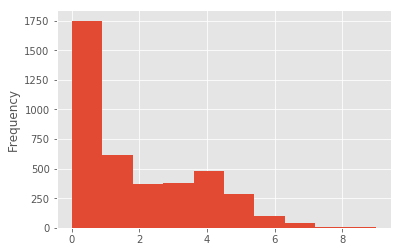

In [263]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

**Rating the weather conditions**

In [264]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


**Changing the data type to category**

In [265]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(pd.api.types.CategoricalDtype(categories=cats))

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good, bad, worse]


## Merging datasets

In [411]:
# APPLE DATASETS
apple = pd.read_csv('datasets/aapl_ohlc.csv',usecols=[0,1,2])
apple['date_and_time'] = pd.to_datetime(apple.date.str.replace('/','-').str.cat(apple.time,sep=' '))
apple['date'] = pd.to_datetime(apple.date)
apple.set_index('date_and_time',inplace=True)

high_low = pd.read_csv('datasets/AAPL2018.csv',usecols=[0,2,3],skiprows=1,names=['DATE','HIGH','LOW'])
high_low['DATE'] = pd.to_datetime(high_low.DATE)

In [412]:
# Preparing the first DataFrame
apple.head()

,date,time,price
date_and_time,,,
2018-02-01 16:00:00,2018-02-01,16:00,170.160004
2018-03-01 16:00:00,2018-03-01,16:00,172.529999
2018-04-01 16:00:00,2018-04-01,16:00,172.539993
2018-05-01 16:00:00,2018-05-01,16:00,173.440002
2018-08-01 16:00:00,2018-08-01,16:00,174.350006


In [413]:
apple.reset_index(inplace=True)
apple.head()

,date_and_time,date,time,price
0,2018-02-01 16:00:00,2018-02-01,16:00,170.160004
1,2018-03-01 16:00:00,2018-03-01,16:00,172.529999
2,2018-04-01 16:00:00,2018-04-01,16:00,172.539993
3,2018-05-01 16:00:00,2018-05-01,16:00,173.440002
4,2018-08-01 16:00:00,2018-08-01,16:00,174.350006


In [414]:
# Preparing the second DataFrame
high_low.head()

,DATE,HIGH,LOW
0,2018-02-01,172.300003,169.259995
1,2018-03-01,174.550003,171.960007
2,2018-04-01,173.470001,172.080002
3,2018-05-01,175.369995,173.050003
4,2018-08-01,175.610001,173.929993


In [415]:
high = high_low[['DATE', 'HIGH']]
high.head()

,DATE,HIGH
0,2018-02-01,172.300003
1,2018-03-01,174.550003
2,2018-04-01,173.470001
3,2018-05-01,175.369995
4,2018-08-01,175.610001


In [416]:
# Merging the DataFrames
apple_high = pd.merge(left=apple, right=high, left_on='date', right_on='DATE', how='left')

In [417]:
# Comparing the DataFrames
apple_high.head()

,date_and_time,date,time,price,DATE,HIGH
0,2018-02-01 16:00:00,2018-02-01,16:00,170.160004,2018-02-01,172.300003
1,2018-03-01 16:00:00,2018-03-01,16:00,172.529999,2018-03-01,174.550003
2,2018-04-01 16:00:00,2018-04-01,16:00,172.539993,2018-04-01,173.470001
3,2018-05-01 16:00:00,2018-05-01,16:00,173.440002,2018-05-01,175.369995
4,2018-08-01 16:00:00,2018-08-01,16:00,174.350006,2018-08-01,175.610001


In [418]:
apple.head()

,date_and_time,date,time,price
0,2018-02-01 16:00:00,2018-02-01,16:00,170.160004
1,2018-03-01 16:00:00,2018-03-01,16:00,172.529999
2,2018-04-01 16:00:00,2018-04-01,16:00,172.539993
3,2018-05-01 16:00:00,2018-05-01,16:00,173.440002
4,2018-08-01 16:00:00,2018-08-01,16:00,174.350006


In [419]:
high.head()

,DATE,HIGH
0,2018-02-01,172.300003
1,2018-03-01,174.550003
2,2018-04-01,173.470001
3,2018-05-01,175.369995
4,2018-08-01,175.610001


In [420]:
# Setting the index
apple_high.set_index('date_and_time', inplace=True)
apple_high.head()

,date,time,price,DATE,HIGH
date_and_time,,,,,
2018-02-01 16:00:00,2018-02-01,16:00,170.160004,2018-02-01,172.300003
2018-03-01 16:00:00,2018-03-01,16:00,172.529999,2018-03-01,174.550003
2018-04-01 16:00:00,2018-04-01,16:00,172.539993,2018-04-01,173.470001
2018-05-01 16:00:00,2018-05-01,16:00,173.440002,2018-05-01,175.369995
2018-08-01 16:00:00,2018-08-01,16:00,174.350006,2018-08-01,175.610001


### Exercises

**Preparing the DataFrames**

In [422]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

**Merging the DataFrame**

In [423]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 18)
(86536, 20)


## Does weather affect the arrest rate?

In [425]:
# Driver gender and vehicle searches
ri.search_conducted.mean()

0.0382153092354627

In [426]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [427]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [429]:
# Examining a multi-indexed Series
search_rate = ri.groupby(['violation','driver_gender']).search_conducted.mean()
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [430]:
type(search_rate)

pandas.core.series.Series

In [431]:
type(search_rate.index)

pandas.core.indexes.multi.MultiIndex

In [432]:
# Working with a multi-indexed Series
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [433]:
search_rate.loc['Equipment']

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

In [434]:
search_rate.loc['Equipment', 'M']

0.07149643705463182

In [435]:
# Converting a multi-indexed Series to a DataFrame
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [436]:
type(search_rate.unstack())

pandas.core.frame.DataFrame

In [437]:
ri.pivot_table(index='violation', columns='driver_gender', values='search_conducted')

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


### Exercises

**Comparing arrest rates by weather rating**

In [439]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


In [440]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.is_arrested.groupby(ri_weather.rating).mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [441]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.is_arrested.groupby([ri_weather.violation,ri_weather.rating]).mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


**Selecting from a multi-indexed Series**

In [442]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


**Reshaping the arrest rate data**

In [443]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


----